### Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)
np.random.seed(42)

### Wygenerowanie danych

In [2]:
from sklearn.datasets import load_iris

raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

df = pd.DataFrame(np.c_[data, target], columns=feature_names + ['target'])
# df = df[(df['target'] == 0.0) | (df['target'] == 1.0)]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
data = df.iloc[:, [2,1]].values
target = df['target'].apply(int).values

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[1.4 3.5]
 [1.4 3. ]
 [1.3 3.2]
 [1.5 3.1]
 [1.4 3.6]]

[0 0 0 0 0]


### Podział na zbiory treningowe i testowe

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

### Standaryzacja cech

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Klasyfikator SVM - linear

In [6]:
from sklearn.svm import SVC

classifier = SVC(C=1.0, kernel='linear')

classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
classifier.score(X_test, y_test)

0.9736842105263158

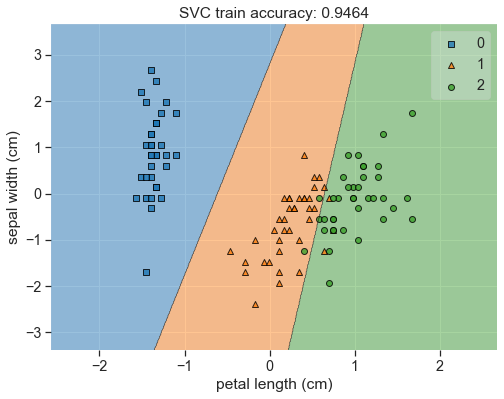

In [8]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC train accuracy: {classifier.score(X_train, y_train):.4f}')
plt.show()

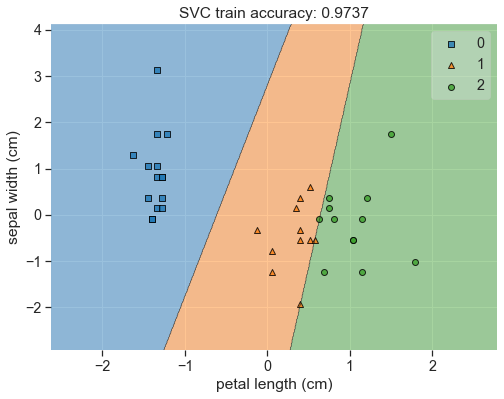

In [9]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC train accuracy: {classifier.score(X_test, y_test):.4f}')
plt.show()

### Klasyfikator SVM - rbf

In [10]:
classifier = SVC(C=1.0, kernel='rbf')

classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.9736842105263158

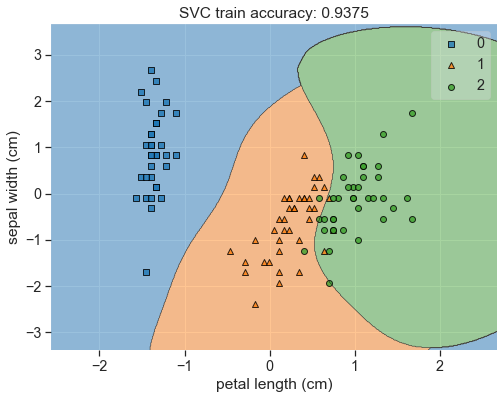

In [11]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC train accuracy: {classifier.score(X_train, y_train):.4f}')
plt.show()

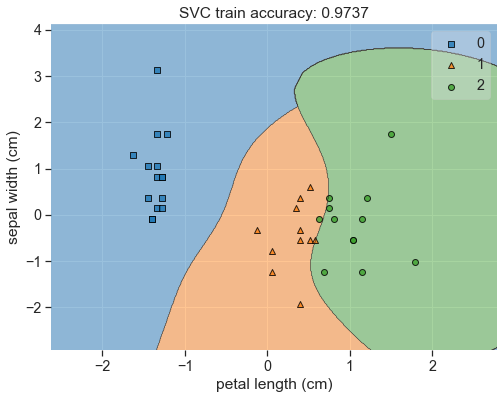

In [12]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC train accuracy: {classifier.score(X_test, y_test):.4f}')
plt.show()